In [1]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
import herschelhelp.cutouts_server as ctts

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting
import pyvo as vo
import glob

import copy

In [2]:
def read_fits(filename):
    hdulist = fits.open(filename)
    data = hdulist[1].data
    hdulist.close()
    return(data)

In [3]:
def find_posteror_source(source_num,source_id):
    #finds the pkl file corresponding to the source you give.
    # Source_num: the row number of the source you want the pkl file for
    # Source_id: the sources id
    
    if type(source_num)==int:
        source_num = [source_num]
        source_id = [source_id]
    

    source_list = []
    for n,num in enumerate(source_num):
        file_num = int(num/10)
        #print(file_num)
        #print('data/fir_v2/xidplus_run_{}/lofar_xidplus_fir_{}_rerun.pkl.pkl'.format(file_num,file_num))
        name = file_list[file_num].replace('fits','pkl.pkl')
        #print(name)
        priors,posterior = xidplus.load(name)
        #print(source_id[n])
        if source_id[n] not in priors[0].ID:
            print('source number :{}: not in opened file. Something is wrong'.format(num))
        source_list.append([priors,posterior])
        
    return(source_list)

In [4]:
lofar_orig = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mips_prior = Table.read('data/data_release/xidplus_prior_cat_MIPS_rerun.fits')
pacs_prior = Table.read('data/data_release/xidplus_prior_cat_rerun_mips.fits')

In [5]:
lofar_orig[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,EBV,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,g_rcs_flux_corr,g_rcs_fluxerr_corr,g_rcs_mag_corr,g_rcs_magerr_corr,r_rcs_flux_corr,r_rcs_fluxerr_corr,r_rcs_mag_corr,r_rcs_magerr_corr,i_rcs_flux_corr,i_rcs_fluxerr_corr,i_rcs_mag_corr,i_rcs_magerr_corr,z_rcs_flux_corr,z_rcs_fluxerr_corr,z_rcs_mag_corr,z_rcs_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,hp_idx_11,hp_depth_cluster,tot_corr_g,tot_corr_err_g,tot_corr_r,tot_corr_err_r,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,g_rest,r_rest,z_rest,g_rcs_rest,r_rcs_rest,i_rcs_rest,z_rcs_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,flo

## Processing MIPS output

In [6]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.fits')
num_not = np.arange(428,860,1)

lofar_mips_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    

    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=100:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_mips_table = vstack([lofar_mips_table,new_table])
data_rerun_table = lofar_mips_table

0
50
data/fir/MIPS/xidplus_run_109/lofar_xidplus_fir_109_rerun.fits
length of table is: 9
100


In [7]:
lofar_mips_table[0]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ105247.91+590256.8,163.19962950065323,59.049132670715174,63.622307,107.307556,19.920975,7.0329432,5.00442e-06,1.0001057,1794.6937,0.0


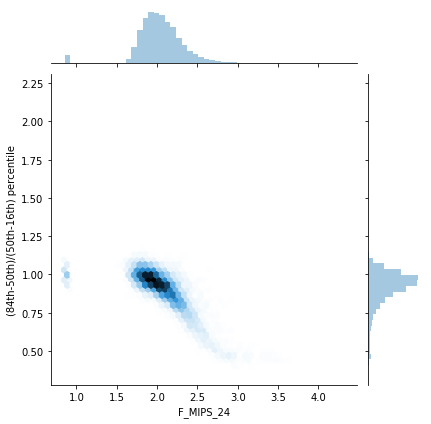

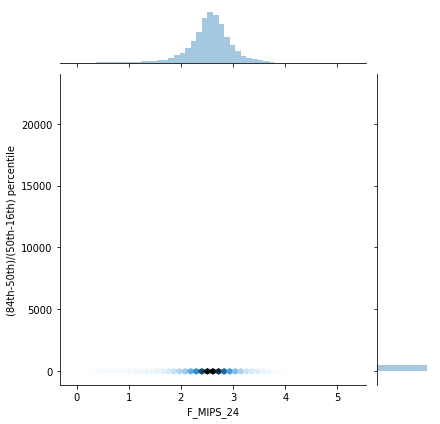

In [8]:
skew=(lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_mips_table['F_MIPS_24']),y=skew, kind='hex')

skew=(lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_MIPS_24']),y=skew, kind='hex')

In [11]:
lofar_mips_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_mips_24'))



In [12]:
ind_SERVS_250=(lofar_mips_table['Pval_res_24']>0.5) | (lofar_mips_table['F_MIPS_24'] <20)
print(ind_SERVS_250.sum(),len(lofar_mips_table))

lofar_mips_table['flag_mips_24'][ind_SERVS_250]=True

3220 10909


In [13]:
rerun_col = Column(np.ones(len(lofar_mips_table)),name='XID+_rerun_mips',dtype='bool')
lofar_mips_table.add_column(rerun_col)

In [14]:
lofar_mips_table[0]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_MIPS_24,flag_mips_24,XID+_rerun_mips
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
ILTJ105247.91+590256.8,163.19962950065323,59.049132670715174,63.622307,107.307556,19.920975,7.0329432,5.00442e-06,1.0001057,1794.6937,0.0,False,False,True


### Plot mips sources

In [50]:
#read in mips image and create wcs
imfolder='../../../../../HELP/dmu_products/dmu17/dmu17_HELP_Legacy_maps/Lockman-SWIRE/data/'

pswfits=imfolder+'wp4_lockman-swire_mips24_map_v1.0.fits.gz'#SPIRE 250 map

MIPS_Map = fits.open(pswfits)

#-----250-------------
hdulist = fits.open(pswfits)
im24phdu=hdulist[0].header
im24hdu=hdulist[1].header

im24=hdulist[1].data*1.0E3 #convert to mJy
nim24=hdulist[2].data*1.0E3 #convert to mJy
w_24 = wcs.WCS(hdulist[1].header)
hdulist.close()

In [51]:
fname = 'data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

In [52]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/120,
              'use_redshift':[False,False,False,False]}

contours are at [-7.83554691e-05 -1.15391003e-05  5.52772684e-05  1.22093637e-04
  1.88910006e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources


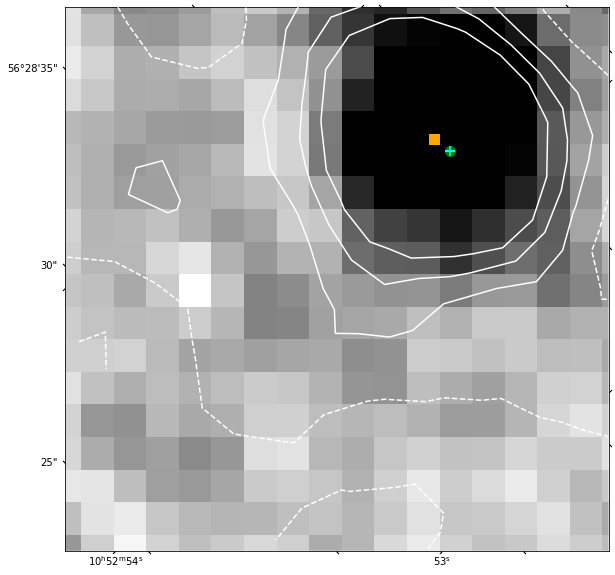

In [54]:
mask = lofar_mips_table['F_MIPS_24']>10**2.5
ra = lofar_mips_table['RA'][mask][3]
dec = lofar_mips_table['Dec'][mask][3]


image_plotting.plot_figure(im24,[mips_prior,lofar_mips_table,lofar_orig],w_24,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Processing PACS output

In [15]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus_fir*.fits')
#num_not = np.arange(428,860,1)

lofar_pacs_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_pacs_table = vstack([lofar_pacs_table,new_table])
data_rerun_table = lofar_pacs_table

0
data/fir/PACS/xidplus_run_587/lofar_xidplus_fir_587_rerun.fits
length of table is: 17
50
100
150
200
250
300
350
400
450
500
550


In [16]:
lofar_pacs_table[0]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ105704.26+582422.3,164.267551,58.406129,3.4386764,7.811158,1.0483952,4.6441975,10.324505,1.4484338,6.1502566,3.0571463,7.517274,3.5048242,0.99899745,1.0001026,3882.1475,2256.4287,0.999,0.44


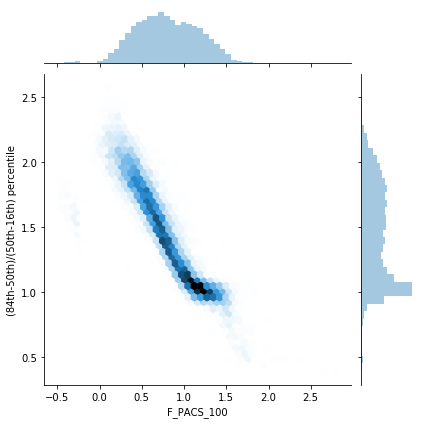

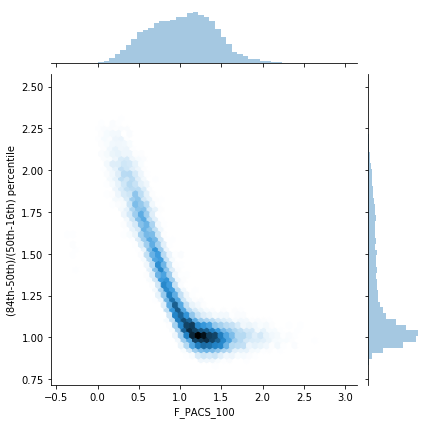

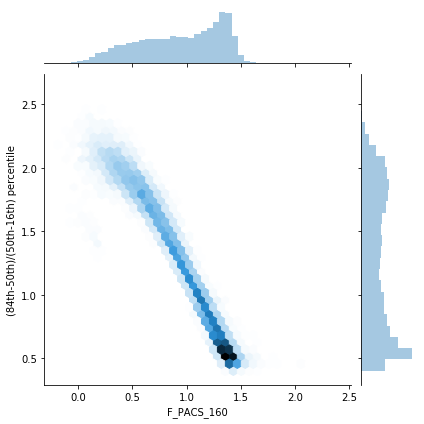

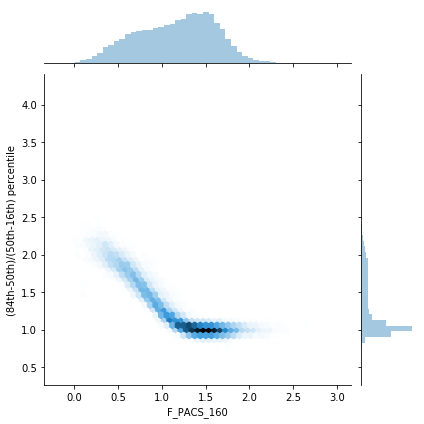

In [17]:
skew=(lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_160']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_160']),y=skew, kind='hex')

In [18]:
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_100'))
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_160'))

In [19]:
ind_SERVS_100=(lofar_pacs_table['Pval_res_100']>0.5) | (lofar_pacs_table['F_PACS_100'] < 12.5)
ind_SERVS_160=(lofar_pacs_table['Pval_res_160']>0.5) | (lofar_pacs_table['F_PACS_160'] < 17.5)
print(ind_SERVS_100.sum(),ind_SERVS_160.sum(),len(lofar_pacs_table))

lofar_pacs_table['flag_pacs_100'][ind_SERVS_100]=True
lofar_pacs_table['flag_pacs_160'][ind_SERVS_160]=True

11756 9503 11757


In [20]:
rerun_col = Column(np.ones(len(lofar_pacs_table)),name='XID+_rerun_pacs',dtype='bool')
lofar_pacs_table.add_column(rerun_col)

In [21]:
lofar_pacs_table[0]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_pacs_100,flag_pacs_160,XID+_rerun_pacs
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
ILTJ105704.26+582422.3,164.267551,58.406129,3.4386764,7.811158,1.0483952,4.6441975,10.324505,1.4484338,6.1502566,3.0571463,7.517274,3.5048242,0.99899745,1.0001026,3882.1475,2256.4287,0.999,0.44,True,True,True


In [86]:
imfolder='../../../../../HELP/dmu_products/dmu18/dmu18_HELP-PACS-maps/data/'

im100fits=imfolder + 'Lockman-SWIRE_PACS100_v0.9.fits'#PACS 100 map
im160fits=imfolder + 'Lockman-SWIRE_PACS160_v0.9.fits'#PACS 160 map

#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist[0].header
im100hdu=hdulist[1].header
im100=hdulist[1].data
w_100 = wcs.WCS(hdulist[1].header)
pixsize100=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim100=hdulist[2].data
hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist[0].header
im160hdu=hdulist[1].header

im160=hdulist[1].data #convert to mJy
w_160 = wcs.WCS(hdulist[1].header)
pixsize160=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim160=hdulist[2].data
hdulist.close()

In [92]:
plot_params = {'marker':['o','+','+','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

In [ ]:
mask = lofar_pacs_table['F_PACS_160']>17.5
ras = lofar_pacs_table['RA'][~ind_SERVS_160]
decs = lofar_pacs_table['Dec'][~ind_SERVS_160]

#ra = 244.01967769676352
#dec = 55.61836714885293
for n in range(len(lofar_pacs_table['RA'][mask])):
    image_plotting.plot_figure(im160,[pacs_prior,lofar_pacs_table,lofar_orig],w_160,ras[n],decs[n],plot_params,contour_data=[radim_data,radim_wcs])

## Processing SPIRE output

In [22]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus_fir*.fits')

lofar_spire_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)

    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_spire_table = vstack([lofar_spire_table,new_table])
data_rerun_table = lofar_spire_table

0
data/fir/SPIRE/xidplus_run_587/lofar_xidplus_fir_587.fits
length of table is: 17
50
100
150
200
250
300
350
400
450
500
550


In [23]:
lofar_spire_table

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ105704.26+582422.3,164.267551,58.406129,3.8285365,8.751908,1.020669,2.9508607,6.7655168,0.7735609,2.1761918,4.9708004,0.6541524,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.99868584,0.99943507,1.0003583,1921.0598,2803.117,3002.3762,0.889,0.998,0.64
ILTJ105704.37+584303.3,164.2682139084377,58.717735147993665,1.9736652,4.2781076,0.5772443,1.4495808,3.6292574,0.39337146,0.99813867,2.3612514,0.2581661,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.9992306,0.9988767,0.9990645,2909.5706,3242.7476,3457.6382,0.991,1.0,0.967
ILTJ105704.70+570816.7,164.26957153425818,57.137977159401146,2.435979,4.9181275,0.8126684,10.7848215,14.01782,7.188743,10.123375,15.060883,4.6468215,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.999272,1.0012094,1.0011754,2029.7546,2433.2593,2002.5187,1.0,1.0,1.0
ILTJ105705.09+583040.9,164.2707226288052,58.51133409721099,6.098842,9.382102,2.839756,4.017964,9.099115,1.1599625,7.1477175,15.219168,2.0101163,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.9988888,1.000366,0.998295,2068.417,2364.1658,2793.5476,0.899,0.997,0.668
ILTJ105705.24+564812.5,164.2731946668406,56.803617111911585,17.625395,19.97917,15.282884,20.652369,23.442938,17.909376,13.995714,16.685204,11.41824,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.99813074,0.99856544,0.99985015,5623.161,3016.7268,5466.1064,1.0,1.0,0.949
ILTJ105705.41+580437.3,164.27254454877004,58.07709149149259,114.967926,118.73187,110.58666,45.12994,51.35551,37.689396,9.467944,14.918352,3.6148765,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.999208,0.99927306,0.99843943,2357.2625,2745.3818,3143.121,0.996,1.0,0.993
ILTJ105706.35+571527.0,164.27641851445577,57.25756797939514,40.80255,43.973354,37.55914,42.01091,46.164944,37.460915,22.01963,27.26815,15.885748,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.99854577,0.9983866,1.0008402,2725.096,2601.736,2979.0532,0.98,1.0,0.916
ILTJ105706.50+575628.9,164.27731457391045,57.941387932877475,7.456141,10.46201,4.0236497,6.7020664,10.514614,2.8360143,4.1233892,7.5693016,1.3573661,-1.5503362,-2.3541574,-3.3579776,4.585976,5.36228,4.7344794,0.9995695,0.9994197,1.0002929,2269.977,2239.8208,2301.9263,0.998,1.0,0.967


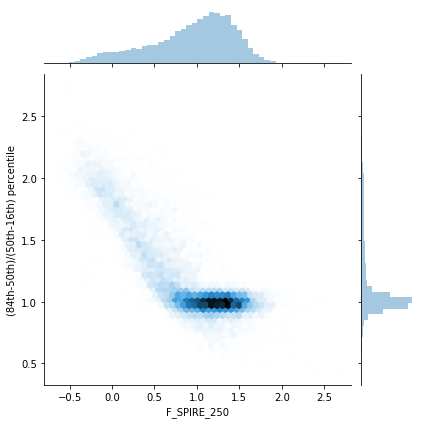

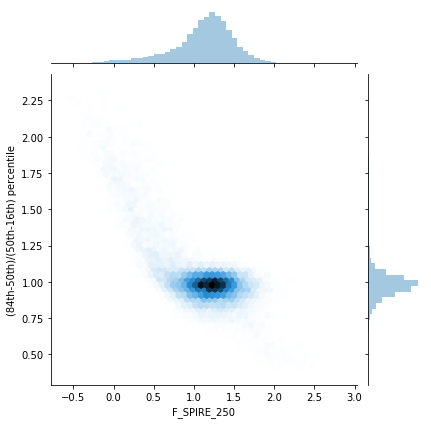

In [24]:
skew=(lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_250']),y=skew, kind='hex')

skew=(lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_SPIRE_250']),y=skew, kind='hex')


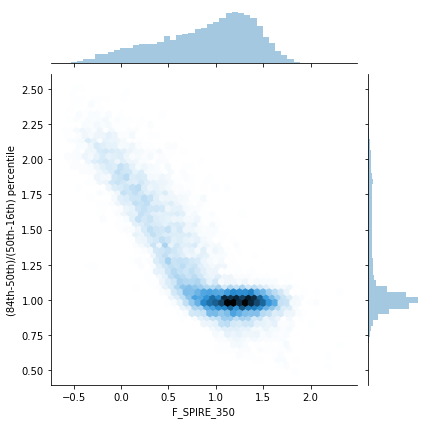

In [25]:
skew=(lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_350']),y=skew, kind='hex')

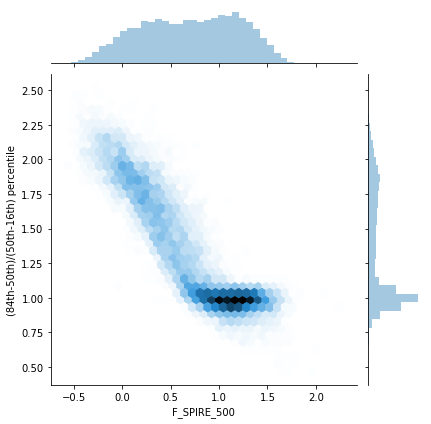

In [26]:
skew=(lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_500']),y=skew, kind='hex')

In [27]:
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_250'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_350'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_500'))

In [28]:
ind_SERVS_250=(lofar_spire_table['Pval_res_250']>0.5) | (lofar_spire_table['F_SPIRE_250'] < 4)
ind_SERVS_350=(lofar_spire_table['Pval_res_350']>0.5) | (lofar_spire_table['F_SPIRE_350'] < 4)
ind_SERVS_500=(lofar_spire_table['Pval_res_500']>0.5) | (lofar_spire_table['F_SPIRE_500'] < 4)

print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(lofar_spire_table))

lofar_spire_table['flag_spire_250'][ind_SERVS_250]=True
lofar_spire_table['flag_spire_350'][ind_SERVS_350]=True
lofar_spire_table['flag_spire_500'][ind_SERVS_500]=True

9308 10714 9380 11757


In [106]:
np.sum(lofar_orig['Pval_res_250']>0.5)

4472

In [70]:
rerun_col = Column(np.ones(len(lofar_spire_table)),name='XID+_rerun_SPIRE',dtype='bool')
lofar_spire_table.add_column(rerun_col)

In [71]:
lofar_spire_table.rename_column('HELP_ID','help_id')

In [72]:
lofar_spire_table[0]

help_id,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool
ILTJ105704.26+582422.3,164.267551,58.406129,3.530474,6.9583125,1.064412,1.4385759,3.364825,0.40165874,1.8511784,4.026608,0.4726596,-0.5715841,-1.1103677,-1.7266283,1.2125971,1.7664366,2.1004057,0.99975693,0.9989041,1.0009207,1736.2623,2444.504,2872.364,0.946,0.973,0.828,True,True,True,True


## Plot SPIRE Sources

In [129]:
imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE250_v1.0.fits'
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['image'].header

im250=hdulist['image'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE350_v1.0.fits'
hdulist = fits.open(pswfits)
im350phdu=hdulist[0].header
im350hdu=hdulist['image'].header

im350=hdulist['image'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE500_v1.0.fits'
hdulist = fits.open(pswfits)
im500phdu=hdulist[0].header
im500hdu=hdulist['image'].header

im500=hdulist['image'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(hdulist['image'].header)
hdulist.close()

In [127]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

contours are at [-7.23908865e-05 -2.71667812e-06  6.69575302e-05  1.36631739e-04
  2.06305947e-04]
plotting 9 sources
plotting 0 sources
plotting 3 sources


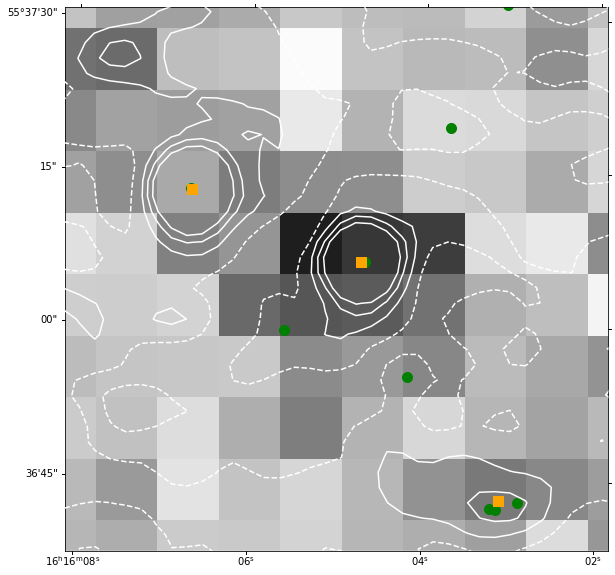

contours are at [-7.23908865e-05 -2.71667812e-06  6.69575302e-05  1.36631739e-04
  2.06305947e-04]
plotting 9 sources
plotting 0 sources
plotting 3 sources


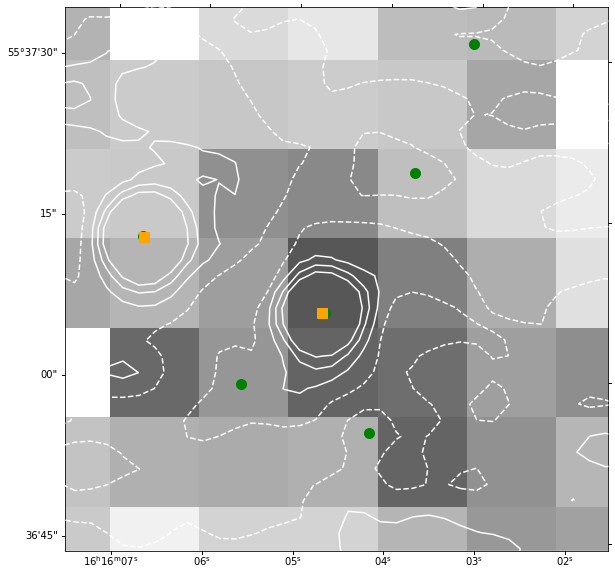

contours are at [-7.23908865e-05 -2.71667812e-06  6.69575302e-05  1.36631739e-04
  2.06305947e-04]
plotting 9 sources
plotting 0 sources
plotting 3 sources


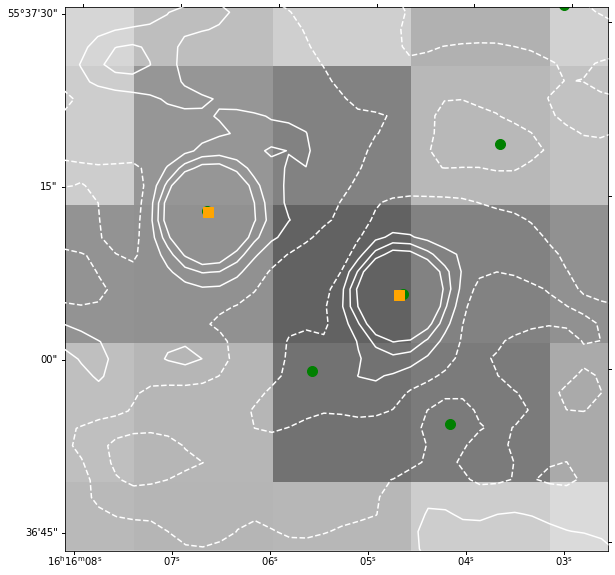

In [130]:
ra = 244.01967769676352
dec = 55.61836714885293
image_plotting.plot_figure(im250,[pacs_prior,lofar_spire_table,lofar_orig],w_250,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im350,[pacs_prior,lofar_spire_table,lofar_orig],w_350,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im500,[pacs_prior,lofar_spire_table,lofar_orig],w_500,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Merge the MIPS, PACS and SPIRE catalogues

In [73]:
MIPS_x_PACS = join(lofar_mips_table,lofar_pacs_table,keys='help_id',join_type='outer')
fir_table = join(MIPS_x_PACS,lofar_spire_table,keys='help_id',join_type='outer')

In [74]:
for name in fir_table.colnames:
    
    if ('RA' in name) or ('Dec' in name):
        print(name)
        fir_table.remove_column(name)
fir_table.rename_column('help_id','Source_Name')

RA_1
Dec_1
RA_2
Dec_2
RA
Dec


In [75]:
fir_table[0]

Source_Name,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_MIPS_24,XID+_rerun_mips,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,XID+_rerun_pacs,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE
,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,
bytes27,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool
ILTJ102955.65+580259.6,7.5941215,12.568286,2.53527,0.0015704,4.862012e-06,0.9987956,3321.831,0.0,True,True,19.978607,26.750326,13.41858,21.442863,25.685009,14.63285,6.209543,3.1540887,7.392655,2.9802322,0.9988557,0.99885386,3113.115,2428.529,0.994,0.087,True,False,True,7.007651,9.644292,4.2049346,3.740409,6.3435483,1.6302118,0.44857028,1.1472315,0.124486774,0.57328004,0.45005608,0.6555992,0.5713516,0.8201086,0.6803712,1.000855,1.0006844,0.9989946,1857.553,2799.566,1655.5464,0.285,0.955,0.048,False,True,True,True


In [76]:
fir_table_v01 = fir_table.copy()

In [77]:
all_fir_table = join(fir_table,fir_table_v01,join_type='outer',keys='Source_Name')

In [78]:
mask = [ids in lofar_orig['Source_Name'] for ids in all_fir_table['Source_Name']]
new_fir_table = all_fir_table[mask]

In [79]:
for name in fir_table.colnames:
    if ('Source' in name) or ('RA' in name) or ('Dec' in name):
        continue

    colname = name+'_1'
    mask = new_fir_table[colname].mask
    new_fir_table[colname][mask] = new_fir_table[name+'_2'][mask]
    new_fir_table.rename_column(colname,name)
    new_fir_table.remove_column(name+'_2')

In [80]:
new_fir_table.colnames

['Source_Name',
 'F_MIPS_24',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'Bkg_MIPS_24',
 'Sig_conf_MIPS_24',
 'Rhat_MIPS_24',
 'n_eff_MIPS_24',
 'Pval_res_24',
 'flag_MIPS_24',
 'XID+_rerun_mips',
 'F_PACS_100',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'F_PACS_160',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'Bkg_PACS_100',
 'Bkg_PACS_160',
 'Sig_conf_PACS_100',
 'Sig_conf_PACS_160',
 'Rhat_PACS_100',
 'Rhat_PACS_160',
 'n_eff_PACS_100',
 'n_eff_PACS_160',
 'Pval_res_100',
 'Pval_res_160',
 'flag_PACS_100',
 'flag_PACS_160',
 'XID+_rerun_pacs',
 'F_SPIRE_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'F_SPIRE_350',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'F_SPIRE_500',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'Bkg_SPIRE_250',
 'Bkg_SPIRE_350',
 'Bkg_SPIRE_500',
 'Sig_conf_SPIRE_250',
 'Sig_conf_SPIRE_350',
 'Sig_conf_SPIRE_500',
 'Rhat_SPIRE_250',
 'Rhat_SPIRE_350',
 'Rhat_SPIRE_500',
 'n_eff_SPIRE_250',
 'n_eff_SPIRE_500',
 'n_eff_SPIRE_350',
 'Pval_res_250',
 'Pval_res_350',
 'Pval_

In [81]:
lofar_fir = join(lofar_orig,new_fir_table,keys='Source_Name',join_type='outer')

In [82]:
lofar_fir[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,EBV,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,g_rcs_flux_corr,g_rcs_fluxerr_corr,g_rcs_mag_corr,g_rcs_magerr_corr,r_rcs_flux_corr,r_rcs_fluxerr_corr,r_rcs_mag_corr,r_rcs_magerr_corr,i_rcs_flux_corr,i_rcs_fluxerr_corr,i_rcs_mag_corr,i_rcs_magerr_corr,z_rcs_flux_corr,z_rcs_fluxerr_corr,z_rcs_mag_corr,z_rcs_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24_1,FErr_MIPS_24_u_1,FErr_MIPS_24_l_1,Bkg_MIPS_24_1,Sig_conf_MIPS_24_1,Rhat_MIPS_24_1,n_eff_MIPS_24_1,Pval_res_24_1,flag_mips_24,F_PACS_100_1,FErr_PACS_100_u_1,FErr_PACS_100_l_1,F_PACS_160_1,FErr_PACS_160_u_1,FErr_PACS_160_l_1,Bkg_PACS_100_1,Bkg_PACS_160_1,Sig_conf_PACS_100_1,Sig_conf_PACS_160_1,Rhat_PACS_100_1,Rhat_PACS_160_1,n_eff_PACS_100_1,n_eff_PACS_160_1,Pval_res_100_1,Pval_res_160_1,flag_PACS_100_1,flag_PACS_160_1,F_SPIRE_250_1,FErr_SPIRE_250_u_1,FErr_SPIRE_250_l_1,F_SPIRE_350_1,FErr_SPIRE_350_u_1,FErr_SPIRE_350_l_1,F_SPIRE_500_1,FErr_SPIRE_500_u_1,FErr_SPIRE_500_l_1,Bkg_SPIRE_250_1,Bkg_SPIRE_350_1,Bkg_SPIRE_500_1,Sig_conf_SPIRE_250_1,Sig_conf_SPIRE_350_1,Sig_conf_SPIRE_500_1,Rhat_SPIRE_250_1,Rhat_SPIRE_350_1,Rhat_SPIRE_500_1,n_eff_SPIRE_250_1,n_eff_SPIRE_500_1,n_eff_SPIRE_350_1,Pval_res_250_1,Pval_res_350_1,Pval_res_500_1,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,hp_idx_11,hp_depth_cluster,tot_corr_g,tot_corr_err_g,tot_corr_r,tot_corr_err_r,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,g_rest,r_rest,z_rest,g_rcs_rest,r_rcs_rest,i_rcs_rest,z_rcs_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest,F_MIPS_24_2,FErr_MIPS_24_u_2,FErr_MIPS_24_l_2,Bkg_MIPS_24_2,Sig_conf_MIPS_24_2,Rhat_MIPS_24_2,n_eff_MIPS_24_2,Pval_res_24_2,flag_MIPS_24,XID+_rerun_mips,F_PACS_100_2,FErr_PACS_100_u_2,FErr_PACS_100_l_2,F_PACS_160_2,FErr_PACS_160_u_2,FErr_PACS_160_l_2,Bkg_PACS_100_2,Bkg_PACS_160_2,Sig_conf_PACS_100_2,Sig_conf_PACS_160_2,Rhat_PACS_100_2,Rhat_PACS_160_2,n_eff_PACS_100_2,n_eff_PACS_160_2,Pval_res_100_2,Pval_res_160_2,flag_PACS_100_2,flag_PACS_160_2,XID+_rerun_pacs,F_SPIRE_250_2,FErr_SPIRE_250_u_2,FErr_SPIRE_250_l_2,F_SPIRE_350_2,FErr_SPIRE_350_u_2,FErr_SPIRE_350_l_2,F_SPIRE_500_2,FErr_SPIRE_500_u_2,FErr_SPIRE_500_l_2,Bkg_SPIRE_250_2,Bkg_SPIRE_350_2,Bkg_SPIRE_500_2,Sig_conf_SPIRE_250_2,Sig_conf_SPIRE_350_2,Sig_conf_SPIRE_500_2,Rhat_SPIRE_250_2,Rhat_SPIRE_350_2,Rhat_SPIRE_500_2,n_eff_SPIRE_250_2,n_eff_SPIRE_500_2,n_eff_SPIRE_350_2,Pval_res_250_2,Pval_res_350_2,Pval_res_500_2,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE
,,,,,,,,,,,,,,,

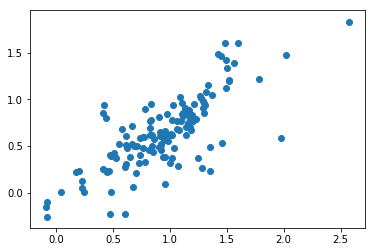

In [98]:
new_mask = ~lofar_fir['F_SPIRE_250_2'].mask
mask = (~np.isnan(lofar_fir['F_SPIRE_250_1'][new_mask])) & (~np.isnan(lofar_fir['F_SPIRE_250_2'][new_mask]))

x = np.log10(lofar_fir['F_SPIRE_250_1'][new_mask][mask])
y = np.log10(lofar_fir['F_SPIRE_250_2'][new_mask][mask])
plt.scatter(x,y)

In [99]:
Table.write(new_fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5.fits')